# TP Python I : Transformations géométriques sur des images

Le but de ce TP est d’appliquer les transformations géométriques que nous avons vues en cours
sur des images.

## 3.1 Importation et affichage des images

Une image de taille $n \cdot m$ pixels peut-être vue comme une matrice de taille $n \cdot m$ où chaque
coecient est un triplet $(r, v, b)$ où $r, v, b$ correspondent aux niveaux de rouge, vert et bleu.

Souvent la profondeur de couleur est **8 bits**, ce qui fait que chaque niveau de couleurs est un
nombre entier entre **0 et 255**. Cela fait 256 = 28 possibilités et en binaire, c’est représenté par un
nombre à 8 chiffres.

Ainsi, nous manipulerons les images comme des objets de type `ndarray` de la bibliothèque
**Numpy**. Ce sont des objets comme ceux de type `array` sauf que les coefficients pourront avoir
une dimension plus grande (3 pour nous).

On commencera par importer `numpy` (avec éventuellement un raccourci).

In [120]:
import importlib.metadata
import numpy as np

importlib.metadata.version('numpy')

'1.24.2'

Pour importer les images, on utilisera `matplotlib` (il y a bien d’autres bibliothèques qui permettent
de manipuler des images mais c’est le choix que l’on fait pour ce TP).

In [121]:
import matplotlib.pyplot as plt

importlib.metadata.version('matplotlib')

'3.6.3'

On peut alors importer des images dans Python.

In [122]:
louvre = plt.imread('Louvre.jpg')

Pour afficher l’image, on utilise la commande suivante.

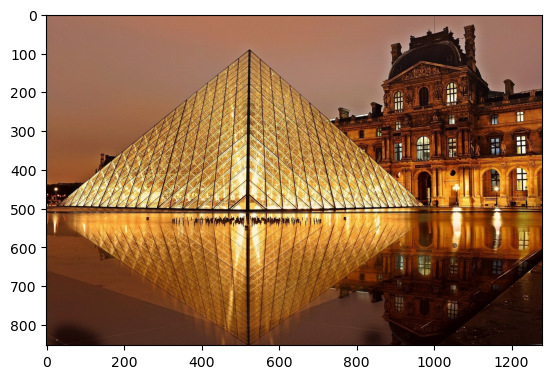

In [123]:
plt.imshow(louvre)

Il y a des nombreuses options (pour les axes, titre, échelles, ...) mais nous n’utiliserons que la
fonction `imshow()` qui affiche une image. 

On obtient une image comme celle ci-dessus.

*On fera très attention aux axes ! La première coordonnée correspond à l’axe vertical dirigé vers le
bas et la seconde à l’axe horizontal vers la gauche.*

C’est-à-dire que les coordonnées se comportent
comme les indices d’une matrice (et commencent à $0$).

Si on veut connaître les niveaux pour un pixel particulier, on écrit la même commande que pour
obtenir le coefficient d’une matrice

In [124]:
print(louvre[50,50])

[159 112  94]


Le niveau de rouge du pixel de coordonnées $(50,50)$ est ainsi $159$. Le niveau $0$ correspond à
l’absence de la couleur et $255$ au niveau maximal de cette couleur.

Par exemple, $[0 \space 0 \space 0]$ correspond à un noir pur et $[255 \space 255 \space 255]$ à un blanc pur.

### Exercice 3.1

Deux images sont fournies sur Moodle dans la partie concernant ce TP.

1. Choisir une image de taille environ 1280 pixels de large (format HD),
2. L’importer,
3. L’afficher et récupérer les niveaux des quatres coins (on indiquera à quels coins cela correspond).

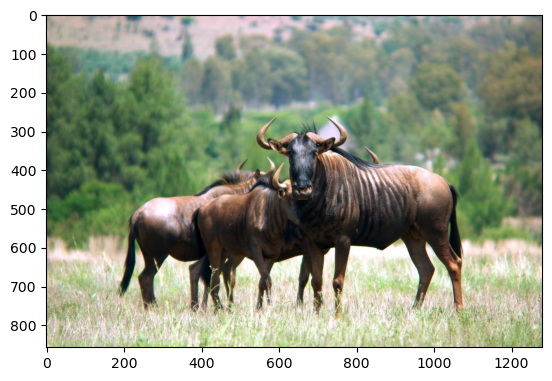

In [125]:
gnu = plt.imread('gnu.jpg')
plt.imshow(gnu)

### Exercice 3.2 (centre)

La méthode `.shape()` retourne les dimensions d’un `ndarray`.

Pour récupérer les dimensions d’une image appelée **image**, on pourra utiliser la commande
`image.shape[0 :2]`.

La fonction `int()` retourne la partie entière d’un nombre à virgule flottante
(ce qui sera utile pour bien avoir des coordonnées entières).

1. Créer une fonction qui prend en entrée une image et retourne les coordonnées du centre de
cette image.
2. Retourner les niveaux de couleurs au centre de l’image précédemment choisie.

In [126]:
def get_center(img: np.array) -> tuple:
  dimension = img.shape[0 :2]
  x = int(dimension[0] / 2)
  y = int(dimension[1] / 2)
  
  return (x, y)

In [127]:
center = get_center(gnu)
colors = gnu[center]

print("Centre:", center)
print("Niveaux de couleurs:", colors)

Centre: (428, 640)
Niveaux de couleurs: [17 26 33]


## 3.2 Création des matrices et transformations mathématiques

Pour les différents exercices, lorsqu’une matrice est demandée elle sera de la classe de `numpy`
(dans le but de pouvoir utiliser le produit matriciel de `numpy`).

Tous les points et les vecteurs seront simplement représentés par un couple de coordonnées.

### Exercice 3.3 (Translation)

Créer une fonction `translation(vecteur, point)` qui prend en
entrée un vecteur et un point et retourne l’image du point par la translation de vecteur donné.

Les vecteur et point seront des couples de coordonnées.

Vous pouvez les transformer en classe `array` de `numpy`, utiliser l’addition de `numpy`
et retourner un couple avec la fonction `tuple()` qui transforme un objet de type `array`
et le transforme en un `uplet` (*tuple* en anglais).

In [128]:
def translation(vecteur: np.array, point: np.array) -> np.array:
  trans = np.add(vecteur, point)
  return tuple(trans)

In [129]:
u = np.array([1, 1, 2], order='F')
p = np.array([1, 1, 0], order='F')
trans = translation(u, p)

print("Vecteur:", u)
print("Point:", p)
print("Translation:", trans)

Vecteur: [1 1 2]
Point: [1 1 0]
Translation: (2, 2, 2)


### Exercice 3.4 (Homothétie)

Créer une fonction `homothetie(centre, rapport, point)` qui prend en entrée le centre,
le rapport d’une homothétie, un point et retourne l’image du point par l’homothétie de centre et de rapport donnés.

In [130]:
def homothetie(centre: np.array, rapport: float, point: np.array) -> tuple:
  direction = translation(point, -centre)
  direction = np.dot(direction, rapport)
  homo = translation(direction, centre)
  return tuple(homo)

In [131]:
c = np.array([1, 1], order='F')
r = 2
p = np.array([2, 1], order='F')
homo = homothetie(centre=c, rapport=r, point=p)

print("Centre:", c)
print("Rapport:", r)
print("Point:", p)
print("Homothétie:", homo)

Centre: [1 1]
Rapport: 2
Point: [2 1]
Homothétie: (3, 1)


### Exercice 3.5 (Matrice de rotation)

Créer une fonction `matrice_rotation(angle)` qui prend en entrée un angle en degrés
et retourne la matrice de la rotation pour cet angle.

On utilisera la bibliothèque math avec les fonctions `cos`, `sin` et `radians`.

Les fonctions sinus et cosinus prennent en argument des radians. Il faudra donc convertir les degrés en radians.

In [132]:
import math

In [133]:
def matrice_rotation(angle: float) -> np.array:
  shp = (2, 2)
  mat = np.zeros(shape=shp, dtype=float)
  rad = math.radians(angle)
  
  mat[0][0] = math.cos(rad)
  mat[0][1] = - math.sin(rad)
  mat[1][0] = math.sin(rad)
  mat[1][1] = math.cos(rad)
  
  return mat

In [134]:
angle = 180
rot = matrice_rotation(angle)
print("Angle:", angle)
print("Matrice de rotation:\n", rot)

Angle: 180
Matrice de rotation:
 [[-1.0000000e+00 -1.2246468e-16]
 [ 1.2246468e-16 -1.0000000e+00]]


### Exercice 3.6 (Rotation)

Créer une fonction `rotation(centre, angle, point)` qui prend en entrée le centre de la rotation,
son angle, un point et retourne l’image du point par la rotation de centre et d’angle donnés.

On pourra faire appel à la fonction créée à l'[Exercice 3.5](#exercice-35-matrice-de-rotation).

In [135]:
def rotation(centre: np.array, angle: float, point: np.array) -> np.array:
  mat_rot = matrice_rotation(angle)
  centered = translation(point, -centre)
  rotation = np.dot(mat_rot, centered)
  rotated = translation(rotation, centre)
  return np.array(rotated)

In [136]:
c = np.array([0, 2], order='F')
a = 90
p = np.array([1, 1], order='F')
r = rotation(centre=c, angle=a, point=p)

print("Centre:", c)
print("Angle:", a)
print("Point:", p)
print("Rotation:", r)

Centre: [0 2]
Angle: 90
Point: [1 1]
Rotation: [1. 3.]


### Exercice 3.7 (Symétrie) *(facultatif)*

Créer une fonction `symetrie(point,coefficients_droite)` qui prend en entrées un point et
les coefficients $(a, b, c)$ de la droite $D$ d’équation $ax + by + c = 0$
et retourne l’image du point par la symétrie d’axe D.

In [137]:
def symetrie(point, coefficients_droite):
  pass

## 3.3 Transformations géométriques sur les images

### 3.3.1 Principe

Le but est maintenant d’appliquer ces transformations géométriques à des images. Le principe
sera le même pour toutes les transformations. On aura deux images `ancienne_image` et `nouvelle_image`.

L'ancienne image est donnée et on veut construire la nouvelle image. On partira
ici du principe que la nouvelle image a exactement les mêmes dimensions que l’image initiale.

Les étapes seront alors les suivantes:

1. Récupérer la taille de l’image initiale avec une commande du type (et comprendre l’argument !)

In [138]:
(m,n)=ancienne_image.shape[0:2]

NameError: name 'ancienne_image' is not defined

2. Créer une image noire avec la bonne taille (`np.uint8` indice que le niveau de chaque niveau
sera donné avec un nombre de $8$ bits) :

In [ ]:
nouvelle_image=np.zeros((m,n, 3), dtype = np.uint8)

NameError: name 'm' is not defined

3. Remplir les niveaux de couleurs pour la nouvelle image. Pour chaque pixel de coor-
données $(x, y)$ on va mettre les niveaux de couleurs du pixel de coordonnées $(x' , y')$ de
`ancienne_image`. La relation entre les coordonnées est

$$ (x, y) = T (x', y') $$

où T est la transformation (rotation, homothétie, translation, ...) que l’on souhaite appliquer.

On a donc besoin des coordonnées $(x', y')$ que l’on obtient avec la relation inverse :

$$ (x', y') = T^{-1}(x, y) $$
